<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Diplomado en Ciencia de Datos</center></span>

# <span style="color:green"><center>Modelos de Regresión Binomial y Logístico</center></span>


<figure>
<center>
<img src="../Imagenes/linea-produccion.jpg" width="500" height="500" align="center" /> 
</center>   
</figure>

<a href="https://commons.wikimedia.org/wiki/File:The_Arms_Production_in_Britain_in_the_First_World_War_Q27861.jpg">Lewis, George P. (Photographer)</a>, Public domain, via Wikimedia Commons

## <span style="color:#4361EE">Profesores</span>

* Alvaro  Montenegro, PhD, <ammontenegrod@unal.edu.co>
* Campo Elías Pardo, PhD, <cepardot@unal.edu.co>
* Daniel  Montenegro, Msc, <dextronomo@gmail.com>
* Camilo José Torres Jiménez, Msc, <cjtorresj@unal.edu.co>

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

* Maria del Pilar Montenegro, pmontenegro88@gmail.com
* Jessica López Mejía, jelopezme@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

* Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

* David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

* Dairo Moreno, damoralesj@unal.edu.co
* Joan Castro, jocastroc@unal.edu.co
* Bryan Riveros, briveros@unal.edu.co
* Rosmer Vargas, rovargasc@unal.edu.co
* Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

* Giovvani Barrera, udgiovanni@gmail.com
* Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:#4361EE">Referencias</span>

1. [Dobson y Baernett, An introduction to Generalizer Linear Model](http://library.lol/main/472B57FA461867F6CFB4334BFED60010)

## <span style="color:#4361EE">Introducción</span>

En esta lección introducimos el modelo logístico y el modelo binomial.

La librería `statsmodels` es un paquete de Python orientado a la exploración de datos con métodos estadísticos. Proporciona una amplia gama de herramientas estadísticas, se integra con Pandas y NumPy, y puede utilizar las cadenas de fórmulas de estilo R para definir modelos.

## <span style="color:#4361EE">Modelo Binomial</span> 

### <span style="color:#4CC9F0">Distribución de probabilidad Binomial</span>

La distribución Binomial surge en problemas con ensayos binarios que pueden resultar en éxito (1) o fallo (0). Si se realizan $n$ ensayos (de Bernoulli) de forma independiente y se define la variable aleatoria $y$ como el  número de éxitos, entonces se dice que $Y$ tiene distribución Binomial con parámetro $\theta$, cuya densidad es dada por:

$$
p(y|\theta) = \binom{n}{y}\theta^y(1-\theta)^{n-y}, \hspace{1mm} y=1,\ldots,n,
$$

en donde 

$$
\binom{n}{y} =\frac{n!}{y!(n-y)!}
$$
es el número de grupos diferentes de tamaño $y$, que se pueden organizar si se tienen en total $n$ elementos. 

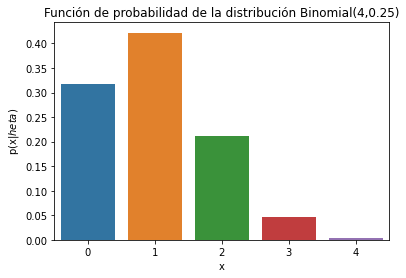

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom

mu = 0.25
n = 4
binomial = binom(n, mu)
x = np.arange(5)
prob_p = binomial.pmf(x)
data = pd.DataFrame(zip(x,prob_p))
data.columns=['x','p']
ax = sns.barplot(data=data, x='x', y='p')
ax.set(xlabel='x', ylabel='p(x|$\theta$)', title='Función de probabilidad de la distribución Binomial({},{})'.format(n,mu))
ax.set_xticklabels(x, rotation=0, size=10)
plt.show()

In [2]:
# media y varianza de la distribución Binomial(4, 0.25)
import numpy as np
from scipy.stats import binom
mu = 0.25
n = 4
binomial = binom(n, mu)
media, var = binomial.stats(moments="mv")
print('Distribución Binomial(4, 0.25); media = {}, varianza {}'.format(media, var))
# calcula algunos cuantiles de la distribución
prob = np.array([0.25, 0.5, 0.75])
cuantiles = binomial.ppf(prob)
print('Distribución Binomial(4, 0.25); probabilidades={}; cuantiles={}'.format(prob, cuantiles))

Distribución Binomial(4, 0.25); media = 1.0, varianza 0.75
Distribución Binomial(4, 0.25); probabilidades=[0.25 0.5  0.75]; cuantiles=[0. 1. 2.]


## <span style="color:#4361EE">Regresión Binomial </span> 

Supongamos que se hacen $n$ observaciones independientes de $ Y_i \sim\text{Binom}(n_i,\pi_i)$. El modelo estadístico usando la función de enlace natural es determinado por

$$
\begin{align}
\text{Probabilidad conjunta: } \hspace{1mm} p(\mathbf{y}|\boldsymbol{\pi}) &= \prod_{i=1}^n Binom(y_i|\pi_i) = \prod_{i=1}^n \binom{n_i}{y_i}\pi_i^{y_i}(1-\pi_i)^{n_i-y_i},\\
\text{Modelo de regresión: } \hspace{1mm}  \log \frac{\pi_i}{1-\pi_i} &= \mathbf{x}_i^t \boldsymbol{\beta} = \beta_1x_{1i} + \ldots +\beta_px_{pi}
\end{align}
$$

### <span style="color:#4CC9F0">Log verosimilitud</span>

La función de log-verosimilitud es dada por


$$
\mathcal{L}(\mu) = \sum_{i=1}^n  x_i\log \pi_i +  (n_i-x_i)\log(1-\pi_i).
$$

## <span style="color:#4361EE">Regresión Logística </span> 

La regresión logística corresponde al caso en el cual tenemos como variable de respuesta 0 o 1. Es decir, la distribución de la variables de respuesta es Bernoulli($\pi$).  El modelo estadístico usando la función de enlace natural es determinado por

$$
\begin{align}
\text{Probabilidad conjunta: } \hspace{1mm} p(\mathbf{y}|\boldsymbol{\pi}) &= \prod_{i=1}^n Bernoulli(y_i|\pi_i) = \prod_{i=1}^n \pi_i^{y_i}(1-\pi_i)^{n_i-y_i},\\
\text{Modelo de regresión: } \hspace{1mm}  \log \frac{\pi_i}{1-\pi_i} &= \mathbf{x}_i^t \boldsymbol{\beta} = \beta_1x_{1i} + \ldots +\beta_px_{pi}
\end{align}
$$

Además, directamente se puede despejar $\pi_i $ para obtener las predicciones. Si escribimos $z_i = \mathbf{x}_i^t \boldsymbol{\beta}$

$$
\hat{y}_i = \pi_i = \frac{z_i}{1+z_i}.
$$


### <span style="color:#4CC9F0">Log verosimilitud</span>

La función de log-verosimilitud es dada por


$$
\mathcal{L}(\mu) = \sum_{i=1}^n  x_i\log \pi_i +  (1-x_i)\log(1-\pi_i) 
$$

### <span style="color:#4CC9F0">Deviance del modelo Binomial</span>

El modelo saturado o con el número máximo de parámetros es aquel en el cual $\hat{y_i}= y_i$. Entonces un cálculo directo muestra que la deviance en este caso es

$$
\text{Deviance} = 2\left[\sum_i y_i \log\left(\frac{y_i}{\hat{y}_i}\right) +  (n_i-y_i)\log \left(\frac{n_i-y_i}{n_i-\hat{y}_i} \right)  \right]
$$

## <span style="color:#4361EE">Ejemplos de Regresión Binomial</span> 

### <span style="color:#4CC9F0">Sobre la API de Statmodels</span>

* `statsmodels.api`: La API estándar. Los datos se separan en variables explicativas (exog) y una variable de respuesta (endog). La especificación de un modelo se realiza a través de clases.
* `statsmodels.formula.api`: La fórmula API. Utiliza la sintaxis de la fórmula de estilo R y los marcos de datos. La API de fórmula es una forma más conveniente de crear modelos que abstraen el texto estándar requerido por la API estándar. Debajo del capó, las API estándar y de fórmula utilizan los mismos modelos subyacentes.

### <span style="color:#4CC9F0">Ejemplo de regresión logística : Titanic</span>

Los datos corresponden al histórico naufragio. Los datos puede descargarlos de [seaborn-data](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv). Este famoso conjunto de datos ha sido utilizado en competencias de maquinas de aprendizaje. Inicialmente son 891 datos y 15 variables. La variable de respuesta (endógena) es binaria. *survived = 1*, si sobrevivió y *survived  = 0*, si no sobrevivió. Tratamos de predecir *survived* a partir de variables explicativas.

- **Survived (Sobrevivió):** Esta columna indica si un pasajero sobrevivió o no al naufragio del Titanic. Suele tener dos valores posibles: 0 para no sobrevivir y 1 para sobrevivir.
- **Pclass (Clase del boleto):** Esta columna representa la clase del boleto que tenía el pasajero. Puede tomar uno de los tres valores posibles: 1 para primera clase, 2 para segunda clase y 3 para tercera clase. La clase se utiliza a menudo como una indicación del estatus socioeconómico del pasajero.
- **Sex (Género):** El género del pasajero, que puede ser "male" (masculino) o "female" (femenino).
- **Age (Edad):** La edad del pasajero en años. Esta columna puede contener valores numéricos.
- **SibSp (Hermanos/cónyuges a bordo):** El número de hermanos o cónyuges que el pasajero tenía a bordo del Titanic.
- **Parch (Padres/hijos a bordo):** El número de padres o hijos que el pasajero tenía a bordo del Titanic.
- **Fare (Tarifa):** El costo del boleto del pasajero.
- **Embarked (Puerto de embarque):** El puerto de embarque del pasajero. Puede tener tres valores posibles: "C" para Cherbourg, "Q" para Queenstown y "S" para Southampton.
- **Class (Clase):** La clase a la que pertenece el pasajero, similar a "Pclass" pero con una representación diferente.
- **Who (Quién):** Una categorización que describe si el pasajero es un niño, hombre o mujer.
- **Adult_male (Adulto masculino):** Indica si el pasajero es un adulto masculino (Verdadero/Falso).
- **Deck (Cubierta):** La cubierta donde se encontraba la cabina del pasajero.
- **Embark_town (Ciudad de embarque):** El nombre de la ciudad donde el pasajero embarcó.
- **Alive (Vivo):** Indica si el pasajero sobrevivió o no en un formato más legible, como "yes" (sí) o "no" (no).
- **Alone (Solo):** Indica si el pasajero viajaba solo (Verdadero/Falso).

Seleccionamos algunas variables y eliminamos los registros con datos faltantes. Al final nos quedamos con 715 registros y 5 variables.

In [3]:
# librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf # smf perimte escribir la fórmula como se hace en la librería gl de R.

In [4]:
# datos
titanic = pd.read_csv('../Datos/titanic.csv')
titanic # son 891 datos y 15 columnas
# selecciona variables de interés
titanic = titanic[["survived", "pclass", "sex", "age", "embark_town"]]
# omite registros con faltantes
titanic = titanic.dropna()
titanic # quedan 712 registros y 5 variables

,survived,pclass,sex,age,embark_town
0,0,3,male,22.0,Southampton
1,1,1,female,38.0,Cherbourg
2,1,3,female,26.0,Southampton
3,1,1,female,35.0,Southampton
4,0,3,male,35.0,Southampton
...,...,...,...,...,...
885,0,3,female,39.0,Queenstown
886,0,2,male,27.0,Southampton
887,1,1,female,19.0,Southampton
889,1,1,male,26.0,Cherbourg


In [5]:
# modelación con statmodels. Ajuste del modelo
import statsmodels.formula.api as smf
#fit logistic regression model
# "survived ~ sex + age + embark_town", 
log_reg = smf.logit("survived ~ sex + age + embark_town", data=titanic).fit()

Optimization terminated successfully.
         Current function value: 0.509889
         Iterations 6


### <span style="color:#4CC9F0">Revisión de los resultados</span>

Usaremos el método summary para revisar los resultados.

In [6]:
# impirme el summary de los resultados
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            4
Date:                Sat, 02 Sep 2023   Pseudo R-squ.:                  0.2444
Time:                        07:46:13   Log-Likelihood:                -363.04
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.209e-49
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.2046      0.322      6.851      0.000       1.574       2.835
sex[T.male]                   -2.4760      0.191    -12.976      0.000      -2.850 

### <span style="color:#4CC9F0">Acceso a los parámetros y demás objetos  de la salida del modelo</span>

En statsmodels, el método fit() devuelve un objeto *Result*. Los coeficientes del modelo, los errores estándar, los valores p, etc., están todos disponibles en este objeto Result.

In [7]:
print(log_reg)

Convenientemente, los resultados se  almacenan como dataframes de Pandas con el nombre del parámetro como índice del marco de datos.

In [8]:
# Inspecciona los parámetros
print(log_reg.params)

Intercept                     2.204585
sex[T.male]                  -2.475962
embark_town[T.Queenstown]    -1.815592
embark_town[T.Southampton]   -1.006949
age                          -0.008079
dtype: float64


Estos son algunos de los valores relevantes para una regresión logística.

|Atributo/función |Descripción|
|---|---|
|params |Parámetros estimados del modelo. Aparece como coef cuando se llama a summary() en un modelo ajustado|
|bse| Error estándar|
|tvalues|columna z al llamar a summary() en un modelo ajustado|
|pvalues|Valores p del modelo|
|conf_int(alfa)| Método que calcula el intervalo de confianza para los parámetros estimados. Para llamar: model.conf_int(0.05)|

Por ejemplo el intervalos de confianza se recupera con

In [9]:
log_reg.conf_int(0.05)

,0,1
Intercept,1.573877,2.835293
sex[T.male],-2.849937,-2.101986
embark_town[T.Queenstown],-2.864233,-0.766950
embark_town[T.Southampton],-1.471180,-0.542717
age,-0.020917,0.004760


Para ver la lista completa de atributos y métodos disponibles, use la función dir() integrada de Python en el modelo ajustado.

In [10]:
print(dir(log_reg))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_data_in_cache', '_get_endog_name', '_get_robustcov_results', '_get_wald_nonlinear', '_transform_predict_exog', '_use_t', 'aic', 'bic', 'bse', 'conf_int', 'converged', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'f_test', 'fittedvalues', 'get_distribution', 'get_influence', 'get_margeff', 'get_prediction', 'im_ratio', 'info_criteria', 'initialize', 'k_constant', 'llf', 'llnull', 'llr', 'llr_pvalue', 'load', 'method', 'mle_retvals', 'mle_settings', 'model', 'nobs', 'normalized_cov_params', 'params', 'pred_table', 'predict', 'prsquared', 'pvalues', 'remove_data', 'resid_dev', 'resid_generali

### <span style="color:#4CC9F0">Evaluación el rendimiento del modelo</span>

Para evaluar la calidad del modelo de regresión logística, podemos observar dos métricas en el resultado:

### <span style="color:#4CC9F0">Pseudo R-cuadrado</span> 

Este valor se puede considerar como el sustituto del valor de *R* cuadrado ($R^2$) para un modelo de regresión lineal.

* Se calcula como el cociente entre la función logaritmo de verosimilitud evaluada en el modelo nulo y el modelo completo.

 * Este valor puede oscilar entre 0 y 1; los valores más altos indican un mejor ajuste del modelo.

* En este ejemplo, el valor pseudo R-cuadrado es  0.2444, que es bastante bajo. Esto nos dice que las variables predictoras en el modelo no hacen un buen trabajo al predecir el valor de la variable de respuesta.

### <span style="color:#4CC9F0">LLR p-valor</span> 

LLR = log likelihood residual, o log vrosimilitud marginal.

Este valor se puede considerar como el sustituto del valor p para el valor F general de un modelo de regresión lineal.

* Si este valor está por debajo de cierto umbral (por ejemplo, α = .05), entonces podemos concluir que el modelo en general es "útil" y es mejor para predecir los valores de la variable de respuesta en comparación con un modelo sin variables predictoras.

* En este ejemplo, el valor p de LLR es 1.209e-49. Dependiendo del nivel de significación que elijamos (p. ej., .01, .05, .1), podemos o no concluir que el modelo en su conjunto es útil. En este caso, es claro que las variables predictores si están aportando a la predicción de la variable observada o en endógena.



### <span style="color:#4CC9F0">Conclusión provisional</span> 

De acuerdo con las salidas explicadas para este problema podemos concluir que 

* Las variables *sex* y *embark_town* y el intercepto son necesarias en el modelo. La variable edad tiene un aporte que alcanza a ser significativo, por lo que en la explicación de del problema no aporta demasiado.
* El valor *LLR p-valor* indica que en realidad las variables explicativas si aportan a la predicción de la variable observada y son necesarias además del intercepto.
* Finalmente el valor de la estadística *Pseudo R-cuadrado* indica que las variables explicativas no son suficientes para tener una explicación satisfactoria de la variable respuesta. 

En conclusión, las variables *sex* y *embark_town* hacen un buen aporte a la explicación de la variable  *survived*, pero no son suficiente para tener una adecuada explicación del problema.


### <span style="color:#4CC9F0">Ejemplo de regresión Binomial: Star9</span> 

En este ejemplo, usamos el conjunto de datos Star9 de los ejemplos de statmodels, el cual que se tomó con permiso de Jeff Gill (2000) Modelos lineales generalizados: un enfoque unificado. 

La variable de respuesta (endog) es una típica variable $\text{Binomial}(n_i,x_i)$. Son datos de personas que presentan una prueba estatal. La variable de respuesta está divida en dos partes: *NABOVE* que corresponde al número de personas en cada estado  con puntaje por encima de la mediana nacional para la parte de matemáticas de la prueba y *NBLOW* el número de personas en cada estado  con puntaje por debajo de la mediana nacional para la parte de matemáticas de la prueba. La documentación de los datos se puede obtener escribiendo:


In [11]:
%matplotlib inline

In [12]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [13]:
print(sm.datasets.star98.NOTE)

::

    Number of Observations - 303 (counties in California).

    Number of Variables - 13 and 8 interaction terms.

    Definition of variables names::

        NABOVE   - Total number of students above the national median for the
                   math section.
        NBELOW   - Total number of students below the national median for the
                   math section.
        LOWINC   - Percentage of low income students
        PERASIAN - Percentage of Asian student
        PERBLACK - Percentage of black students
        PERHISP  - Percentage of Hispanic students
        PERMINTE - Percentage of minority teachers
        AVYRSEXP - Sum of teachers' years in educational service divided by the
                number of teachers.
        AVSALK   - Total salary budget including benefits divided by the number
                   of full-time teachers (in thousands)
        PERSPENK - Per-pupil spending (in thousands)
        PTRATIO  - Pupil-teacher ratio.
        PCTAF    - Percenta

In [14]:
#Carga los datos y agrega una constante a las variables exógenas (independientes):

In [15]:
data = sm.datasets.star98.load()

data.exog = sm.add_constant(data.exog, prepend=False)

In [16]:
data.exog.columns

Index(['LOWINC', 'PERASIAN', 'PERBLACK', 'PERHISP', 'PERMINTE', 'AVYRSEXP',
       'AVSALK', 'PERSPENK', 'PTRATIO', 'PCTAF', 'PCTCHRT', 'PCTYRRND',
       'PERMINTE_AVYRSEXP', 'PERMINTE_AVSAL', 'AVYRSEXP_AVSAL',
       'PERSPEN_PTRATIO', 'PERSPEN_PCTAF', 'PTRATIO_PCTAF',
       'PERMINTE_AVYRSEXP_AVSAL', 'PERSPEN_PTRATIO_PCTAF', 'const'],
      dtype='object')

In [17]:
data.exog

,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,PTRATIO,PCTAF,...,PCTYRRND,PERMINTE_AVYRSEXP,PERMINTE_AVSAL,AVYRSEXP_AVSAL,PERSPEN_PTRATIO,PERSPEN_PCTAF,PTRATIO_PCTAF,PERMINTE_AVYRSEXP_AVSAL,PERSPEN_PTRATIO_PCTAF,const
0,34.39730,23.299300,14.235280,11.411120,15.918370,14.70646,59.15732,4.445207,21.71025,57.03276,...,22.222220,234.102872,941.68811,869.9948,96.50656,253.52242,1238.1955,13848.8985,5504.0352,1.0
1,17.36507,29.328380,8.234897,9.314884,13.636360,16.08324,59.50397,5.267598,20.44278,64.62264,...,0.000000,219.316851,811.41756,957.0166,107.68435,340.40609,1321.0664,13050.2233,6958.8468,1.0
2,32.64324,9.226386,42.406310,13.543720,28.834360,14.59559,60.56992,5.482922,18.95419,53.94191,...,0.000000,420.854496,1746.49488,884.0537,103.92435,295.75929,1022.4252,25491.1232,5605.8777,1.0
3,11.90953,13.883090,3.796973,11.443110,11.111110,14.38939,58.33411,4.165093,21.63539,49.06103,...,7.142857,159.882095,648.15671,839.3923,90.11341,204.34375,1061.4545,9326.5797,4421.0568,1.0
4,36.88889,12.187500,76.875000,7.604167,43.589740,13.90568,63.15364,4.324902,18.77984,52.38095,...,0.000000,606.144976,2752.85075,878.1943,81.22097,226.54248,983.7059,38280.2616,4254.4314,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,62.23968,13.820860,3.956157,32.128790,15.884480,13.27089,52.88133,4.324174,20.98711,8.00000,...,18.181820,210.801187,839.99243,701.7823,90.75192,34.59339,167.8969,11147.4471,726.0153,1.0
299,46.16188,1.150575,0.800400,45.622810,13.333330,11.80714,48.42615,3.945069,19.85830,53.77358,...,0.000000,157.428494,645.68184,571.7743,78.34236,212.14048,1067.8519,7623.6559,4212.7494,1.0
300,43.41431,3.648564,1.541204,46.319980,21.377670,14.40468,53.79616,3.845481,22.70884,29.89247,...,6.666667,307.938495,1150.03656,774.9165,87.32641,114.95093,678.8233,16565.9086,2610.4022,1.0
301,70.62104,20.461720,2.989345,17.423050,11.032860,16.56420,61.70566,3.970984,24.88647,15.14286,...,13.636360,182.750500,680.78991,1022.1049,98.82377,60.13205,376.8523,11276.7402,1496.4746,1.0


In [18]:
#La variable dependiente es N por 2 (Éxito: NABOVE, Fracaso: NBELOW):

In [19]:
data.endog

,NABOVE,NBELOW
0,452.0,355.0
1,144.0,40.0
2,337.0,234.0
3,395.0,178.0
4,8.0,57.0
...,...,...
298,96.0,246.0
299,37.0,117.0
300,208.0,387.0
301,199.0,510.0


#### <span style="color:#4CC9F0">Ajuste del modelo</span> 

In [20]:
glm_binom = sm.GLM(data.endog, data.exog, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     ['NABOVE', 'NBELOW']   No. Observations:                  303
Model:                              GLM   Df Residuals:                      282
Model Family:                  Binomial   Df Model:                           20
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -2998.6
Date:                  Sat, 02 Sep 2023   Deviance:                       4078.8
Time:                          07:46:14   Pearson chi2:                 4.05e+03
No. Iterations:                       5   Pseudo R-squ. (CS):              1.000
Covariance Type:              nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
LOWINC

#### <span style="color:#4CC9F0">Cantidades de interés</span>

In [21]:
print('Total number of trials:',  data.endog.iloc[:, 0].sum())
print('Parameters: ', res.params)
print('T-values: ', res.tvalues)

Total number of trials: 108418.0
Parameters:  LOWINC                    -0.016815
PERASIAN                   0.009925
PERBLACK                  -0.018724
PERHISP                   -0.014239
PERMINTE                   0.254487
AVYRSEXP                   0.240694
AVSALK                     0.080409
PERSPENK                  -1.952161
PTRATIO                   -0.334086
PCTAF                     -0.169022
PCTCHRT                    0.004917
PCTYRRND                  -0.003580
PERMINTE_AVYRSEXP         -0.014077
PERMINTE_AVSAL            -0.004005
AVYRSEXP_AVSAL            -0.003906
PERSPEN_PTRATIO            0.091714
PERSPEN_PCTAF              0.048990
PTRATIO_PCTAF              0.008041
PERMINTE_AVYRSEXP_AVSAL    0.000222
PERSPEN_PTRATIO_PCTAF     -0.002249
const                      2.958878
dtype: float64
T-values:  LOWINC                    -38.749083
PERASIAN                   16.504736
PERBLACK                  -25.182189
PERHISP                   -32.817913
PERMINTE                

#### <span style="color:#4CC9F0">Gráfico curva ajustada</span>

In [22]:
nobs = res.nobs
y = data.endog.iloc[:,0]/data.endog.sum(1)
yhat = res.mu

In [23]:
fit_data = pd.DataFrame({'y':y, 'yhat':yhat})
fit_data = fit_data.sort_values(by= 'yhat')
fit_data['indice'] = np.array(np.arange(fit_data.shape[0]))
fit_data

,y,yhat,indice
287,0.171642,0.097120,0
42,0.093750,0.117765,1
103,0.199820,0.134021,2
282,0.351351,0.141042,3
77,0.086957,0.148461,4
...,...,...,...
90,0.829736,0.834301,298
116,0.928302,0.858354,299
148,0.600000,0.858500,300
252,0.889256,0.863858,301


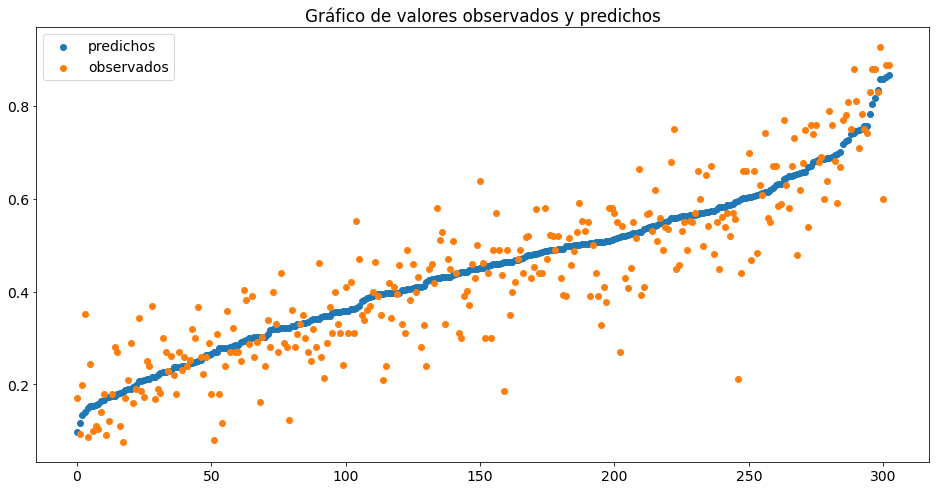

In [24]:

plt.scatter(fit_data['indice'], fit_data['yhat'], label='predichos')
plt.scatter(fit_data['indice'], fit_data['y'], label='observados')
plt.legend()
plt.title('Gráfico de valores observados y predichos')
plt.show()

#### <span style="color:#4CC9F0">Gráfico de valores ajustados v.s. valores observados</span>

In [25]:
from statsmodels.graphics.api import abline_plot

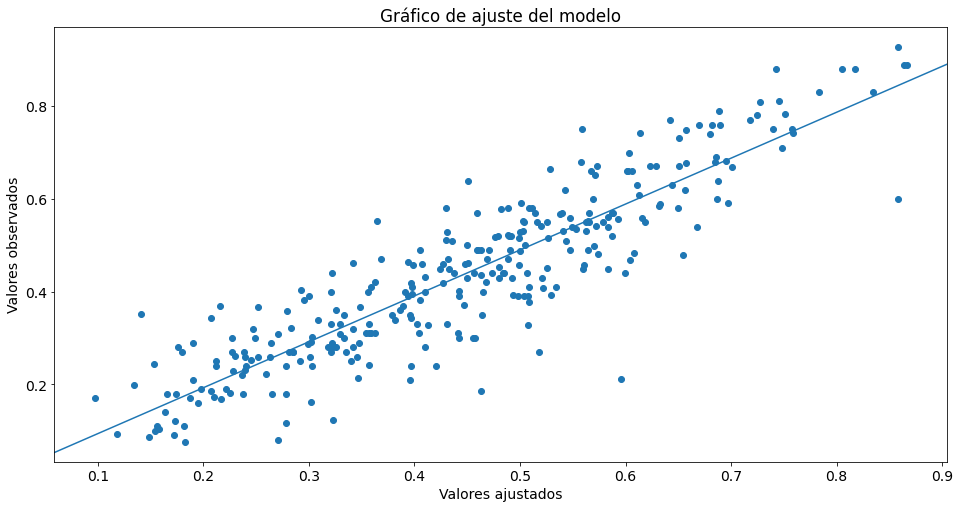

In [26]:
fig, ax = plt.subplots()
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('Gráfico de ajuste del modelo')
ax.set_ylabel('Valores observados')
ax.set_xlabel('Valores ajustados');

#### <span style="color:#4CC9F0">Gráfico de Residuales de Person</span>

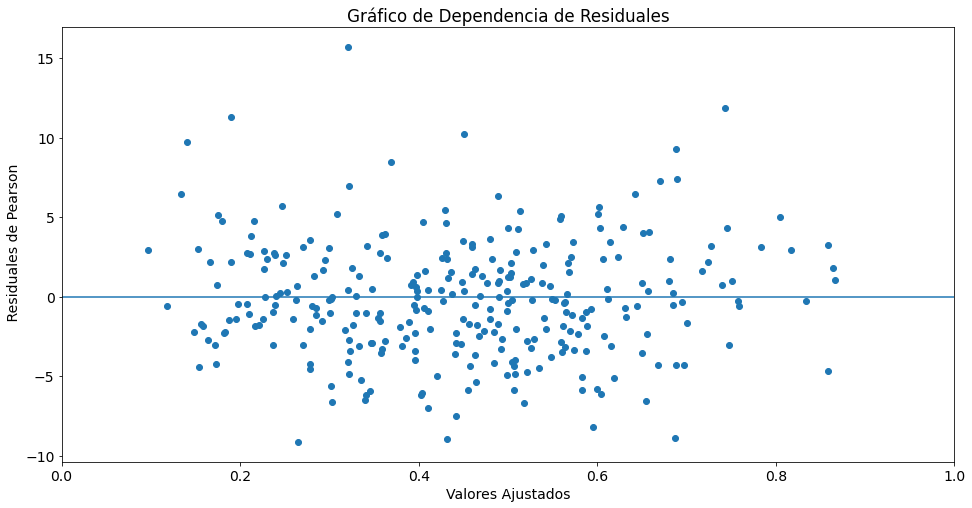

In [27]:
fig, ax = plt.subplots()

ax.scatter(yhat, res.resid_pearson)
ax.hlines(0, 0, 1)
ax.set_xlim(0, 1)
ax.set_title('Gráfico de Dependencia de Residuales')
ax.set_ylabel(' Residuales de Pearson')
ax.set_xlabel('Valores Ajustados')
plt.show()

#### <span style="color:#4CC9F0">Histograma de residuales deviance estandarizados</span>

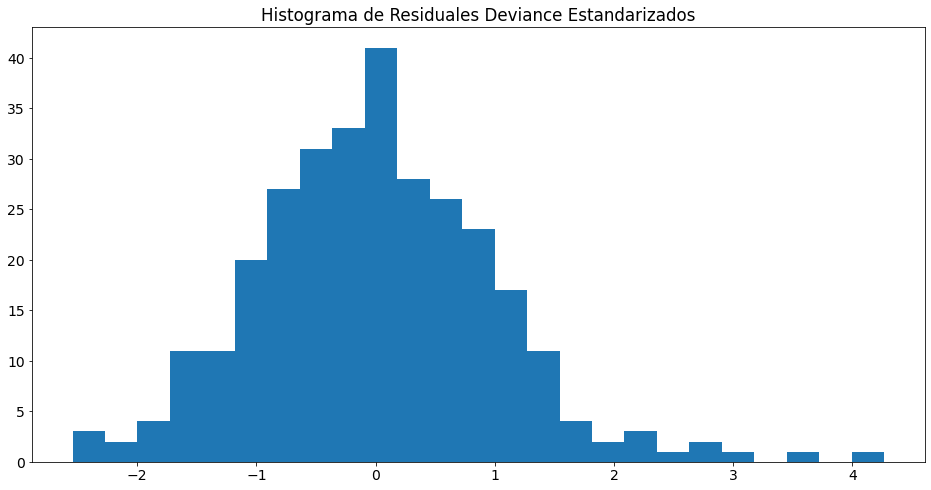

In [28]:
from scipy import stats

fig, ax = plt.subplots()

resid = res.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histograma de Residuales Deviance Estandarizados');

#### <span style="color:#4CC9F0">qq plot de residuales deviance</span>

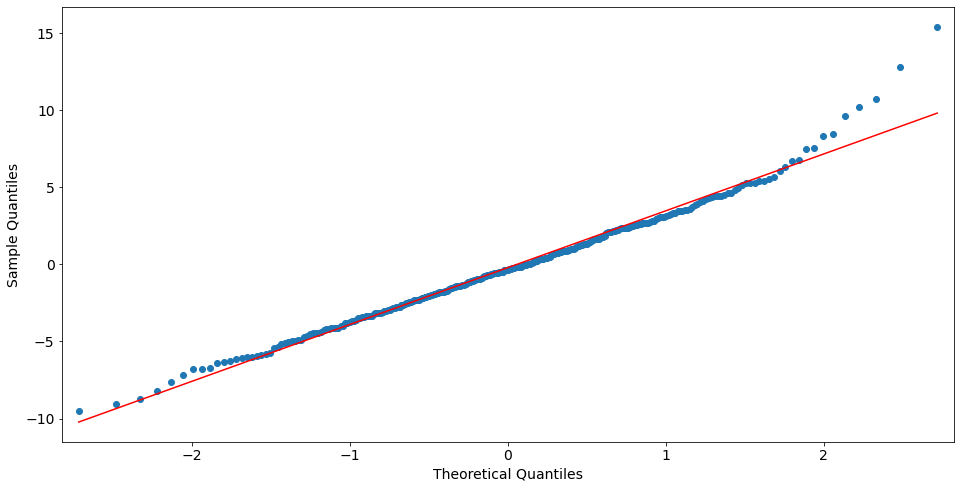

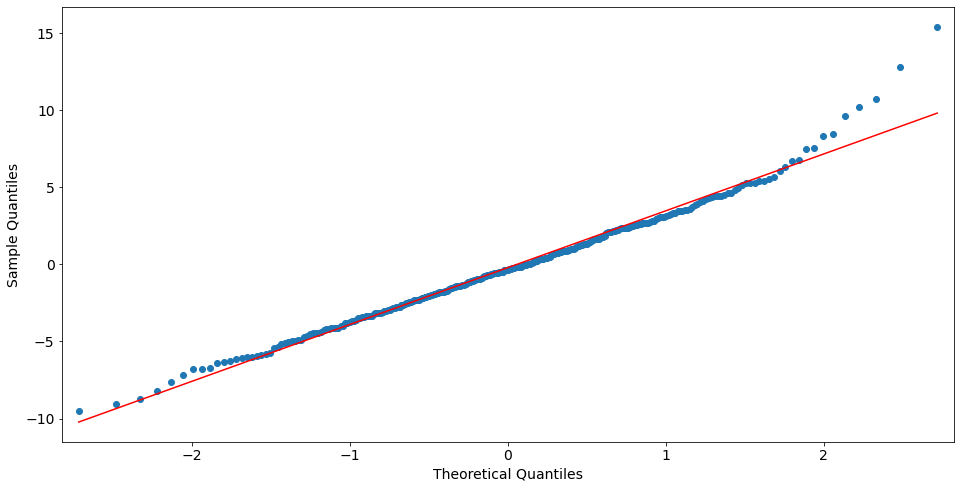

In [29]:
from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')

### <span style="color:#4CC9F0">Problema de la dosis</span>

Problema de la dosis. Tomado de 
[Dobson y Baernett, An introduction oto Generalizer Linear Model](http://library.lol/main/472B57FA461867F6CFB4334BFED60010). Los datos corresponde al número de escarabajos que mueren después de cinco hora de estar expuestos a un veneno en diferentes concentraciones.

In [30]:
import pandas as pd

escarabajos = {'Dosis':[1.6907, 1.7242, 1.7552, 1.7842, 1.8113, 1.8369, 1.8610, 1.8839],
             'Expuestos': [59, 60, 62, 56, 63, 59, 62, 60],
             'Muertos':[6, 13, 18, 28, 52, 53, 61, 60],
             'Proporción': [6.0/59, 13./60, 18./62, 28./56, 52./63, 53./59 ,61./62, 60./60]}
escarabajos = pd.DataFrame(escarabajos)
escarabajos['Vivos'] = escarabajos.Expuestos - escarabajos.Muertos 
escarabajos

,Dosis,Expuestos,Muertos,Proporción,Vivos
0,1.6907,59,6,0.101695,53
1,1.7242,60,13,0.216667,47
2,1.7552,62,18,0.290323,44
3,1.7842,56,28,0.500000,28
4,1.8113,63,52,0.825397,11
5,1.8369,59,53,0.898305,6
6,1.8610,62,61,0.983871,1
7,1.8839,60,60,1.000000,0


#### <span style="color:#4CC9F0">Gráfica dosis v.s. proporción</span>

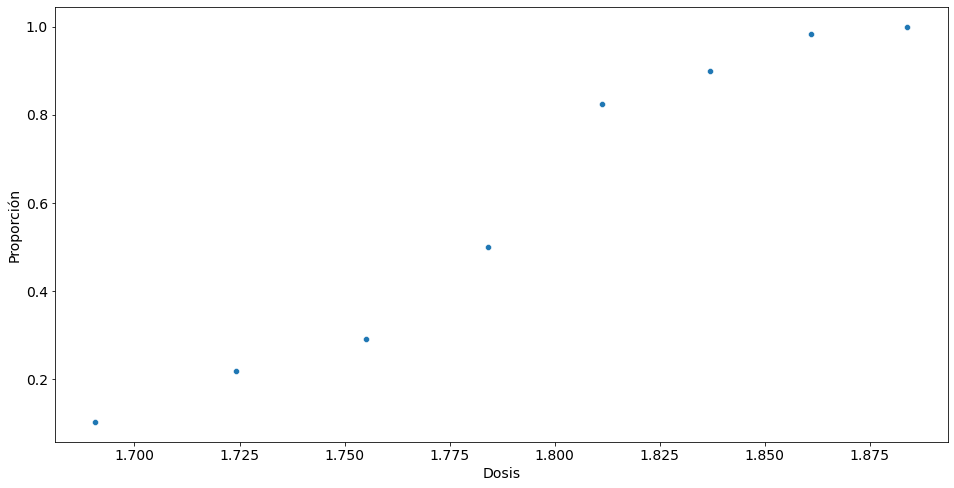

In [31]:
import seaborn as sns
sns.scatterplot(data=escarabajos, x='Dosis', y='Proporción')
plt.show()

Observe la forma de S de los datos. Además se tiene que esta es un relación entre números reales y números entre 0 y 1. Funciones candidatas para modelar este tipo de datos son las funciones de distribución.

#### <span style="color:#4CC9F0">Modelación con GLM de Statsmodels</span>

In [32]:
endog = escarabajos[['Muertos', 'Vivos']]
exog =  escarabajos['Dosis']
exog =  sm.add_constant(exog, prepend=False)

In [33]:
exog

,Dosis,const
0,1.6907,1.0
1,1.7242,1.0
2,1.7552,1.0
3,1.7842,1.0
4,1.8113,1.0
5,1.8369,1.0
6,1.8610,1.0
7,1.8839,1.0


In [34]:
endog

,Muertos,Vivos
0,6,53
1,13,47
2,18,44
3,28,28
4,52,11
5,53,6
6,61,1
7,60,0


In [35]:
glm_binom = sm.GLM(endog, exog, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     ['Muertos', 'Vivos']   No. Observations:                    8
Model:                              GLM   Df Residuals:                        6
Model Family:                  Binomial   Df Model:                            1
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -18.715
Date:                  Sat, 02 Sep 2023   Deviance:                       11.232
Time:                          07:46:15   Pearson chi2:                     10.0
No. Iterations:                       6   Pseudo R-squ. (CS):              1.000
Covariance Type:              nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Dosis         34.2703      2.912

#### <span style="color:#4CC9F0">Curva ajustada</span>

In [36]:
nobs = res.nobs
y = endog.iloc[:,0]/endog.sum(1)
yhat = res.mu

In [37]:
fit_data = pd.DataFrame({'y':y, 'yhat':yhat})
fit_data = fit_data.sort_values(by= 'yhat')
fit_data['indice'] = np.array(np.arange(fit_data.shape[0]))
fit_data

,y,yhat,indice
0,0.101695,0.058601,0
1,0.216667,0.164028,1
2,0.290323,0.362119,2
3,0.500000,0.605315,3
4,0.825397,0.795172,4
5,0.898305,0.903236,5
6,0.983871,0.955196,6
7,1.000000,0.979049,7


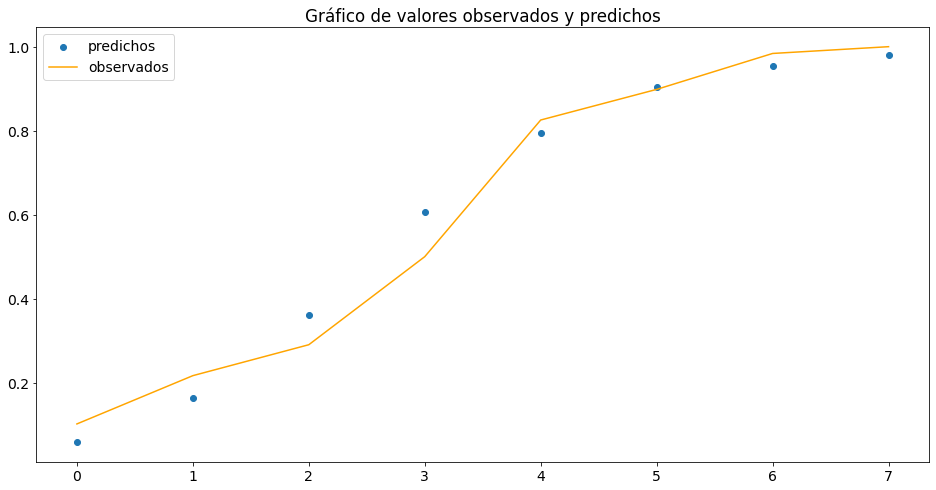

In [38]:
plt.scatter(fit_data['indice'], fit_data['yhat'], label='predichos')
plt.plot(fit_data['indice'], fit_data['y'], label='observados', color="orange")
plt.legend()
plt.title('Gráfico de valores observados y predichos')
plt.show()

#### <span style="color:#4CC9F0">Curva ajustados v.s. predichos</span>

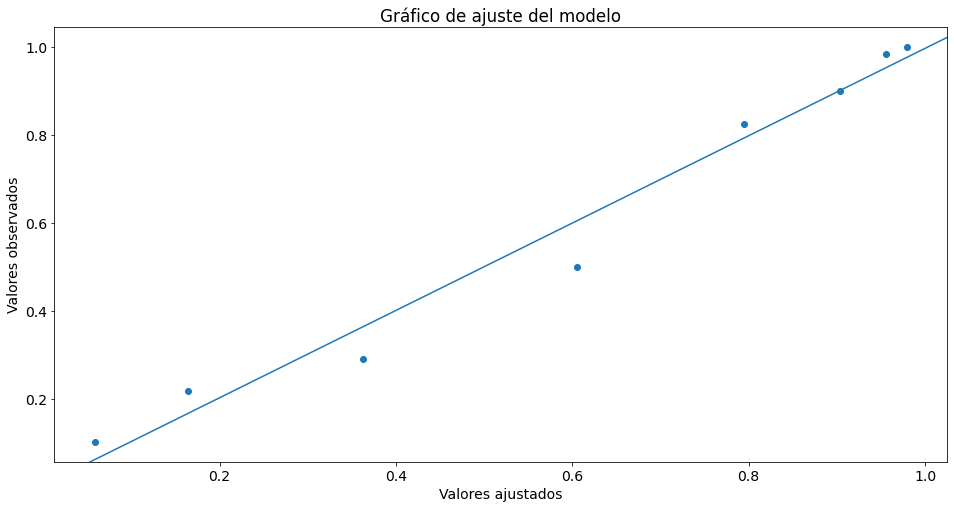

In [39]:
from statsmodels.graphics.api import abline_plot

fig, ax = plt.subplots()
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('Gráfico de ajuste del modelo')
ax.set_ylabel('Valores observados')
ax.set_xlabel('Valores ajustados');

#### <span style="color:#4CC9F0">Residuales de Pearson</span>

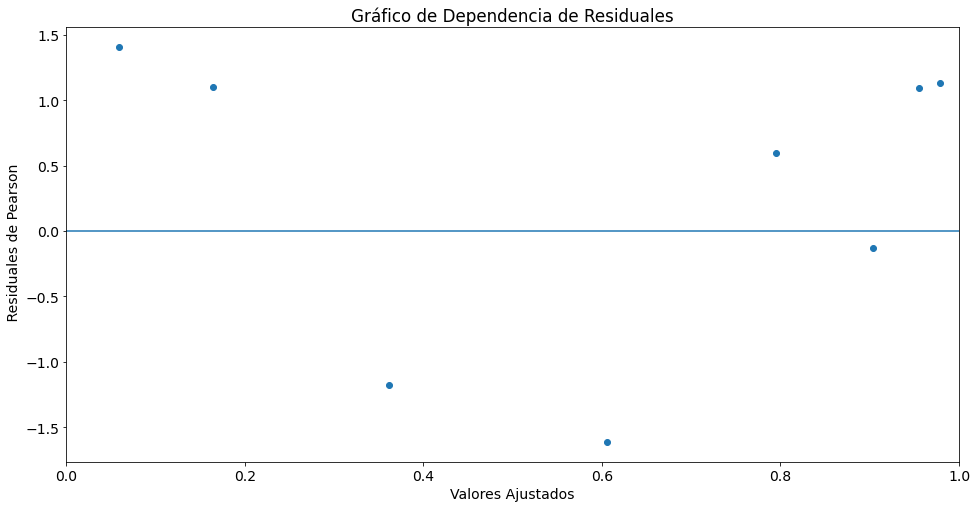

In [40]:
fig, ax = plt.subplots()

ax.scatter(yhat, res.resid_pearson)
ax.hlines(0, 0, 1)
ax.set_xlim(0, 1)
ax.set_title('Gráfico de Dependencia de Residuales')
ax.set_ylabel(' Residuales de Pearson')
ax.set_xlabel('Valores Ajustados')
plt.show()

#### <span style="color:#4CC9F0">Histograma de residuales deviance estandarizados</span>

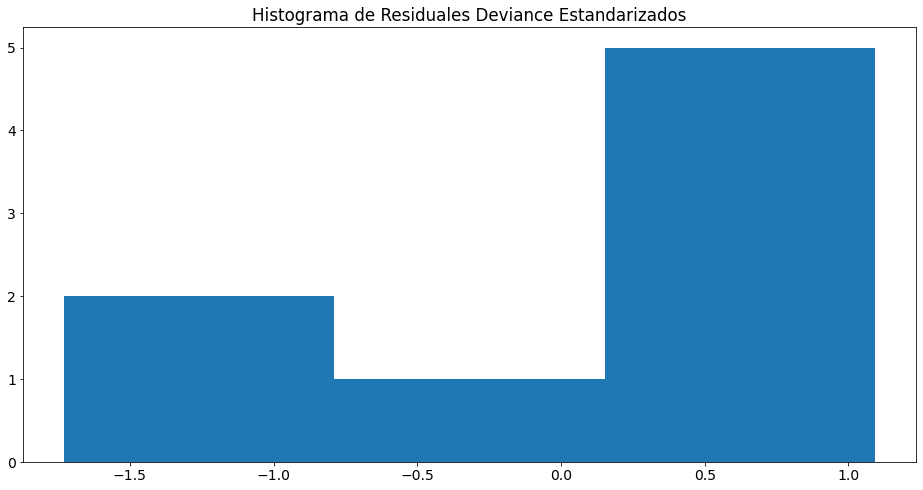

In [41]:
from scipy import stats

fig, ax = plt.subplots()

resid = res.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=3)
ax.set_title('Histograma de Residuales Deviance Estandarizados');

#### <span style="color:#4CC9F0">qq plot de residuales deviance</span>

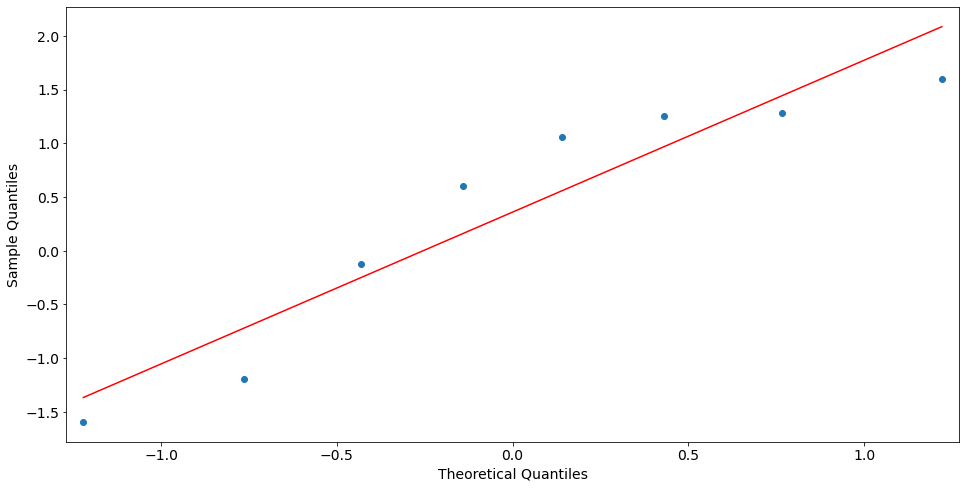

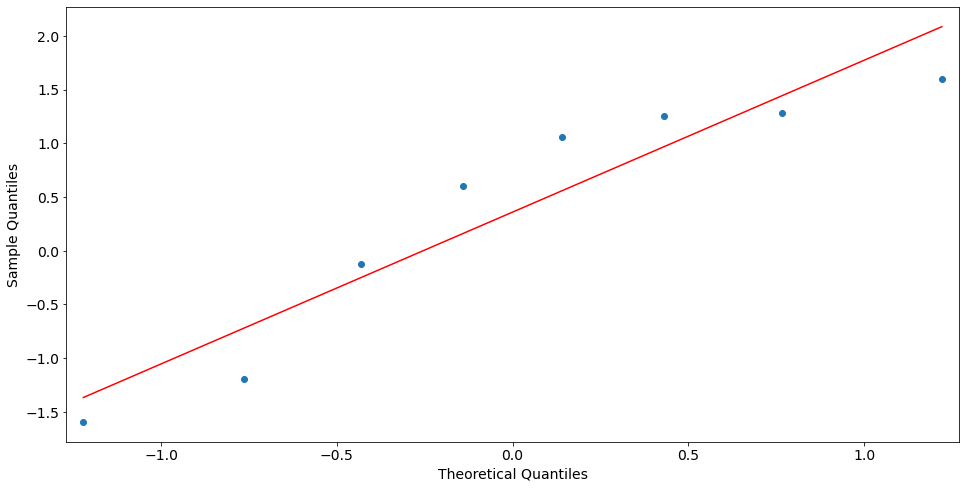

In [42]:
from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')

#### <span style="color:#4CC9F0">Dosis Letal

La dosis letal se define como la dosis que téoricamente mata al 50% de los expuestos.

De la relación

$$
\log \frac{\pi}{1-\pi} = intercept +\beta*dosis
$$

se obtiene 

$$
\log \frac{0.5}{0.5} = 0 =  -60.7175 +34.2703*dosis
$$

de donde la dosis letal es 

$$
\text{dosis  letal} = \frac{60.7175}{34.2703}  = 1.77
$$